# SmartHome Voltage Data Analysis

In [96]:
import os
import json 
import pandas as pd
import matplotlib.pyplot as plt

#Specify target SenML + JSON data source file
data_folder = '../data' 
data_file = 'voltage_senml.json'

file_path = os.path.join(data_folder,data_file)

senml_record_list = []
#Read the target JSON File and create an array for each contained SenML Pack
with open(file_path) as file:
    for line in file.readlines():
        json_senml_pack = json.loads(line)
        senml_record_list.append(json_senml_pack[0])

#Create a Pandas DataFrame from the list of SenML Record
df = pd.DataFrame(senml_record_list) 
print(df)

                        n       v           t
0      device0001:voltage  241.97  1167606000
1      device0001:voltage  241.75  1167606060
2      device0001:voltage  241.64  1167606120
3      device0001:voltage  241.71  1167606180
4      device0001:voltage  241.98  1167606240
...                   ...     ...         ...
44635  device0001:voltage  243.80  1170284100
44636  device0001:voltage  243.26  1170284160
44637  device0001:voltage  242.59  1170284220
44638  device0001:voltage  242.87  1170284280
44639  device0001:voltage  242.80  1170284340

[44640 rows x 3 columns]


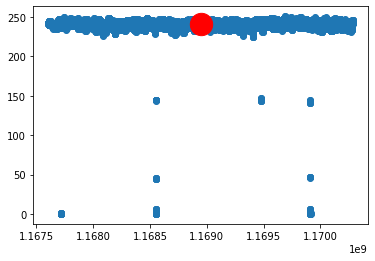

In [98]:
#Plot a Scattered Graph of available Voltage Data
plt.scatter(df['t'],df['v'])
plt.scatter(df['t'].mean(),df['v'].mean(),c='#ff0000',s=500)
plt.show()

In [99]:
#Add a new column to the dataframe with the datetime
df['datetime'] = pd.to_datetime(df['t'], unit='s')
print(df)

                        n       v           t            datetime
0      device0001:voltage  241.97  1167606000 2006-12-31 23:00:00
1      device0001:voltage  241.75  1167606060 2006-12-31 23:01:00
2      device0001:voltage  241.64  1167606120 2006-12-31 23:02:00
3      device0001:voltage  241.71  1167606180 2006-12-31 23:03:00
4      device0001:voltage  241.98  1167606240 2006-12-31 23:04:00
...                   ...     ...         ...                 ...
44635  device0001:voltage  243.80  1170284100 2007-01-31 22:55:00
44636  device0001:voltage  243.26  1170284160 2007-01-31 22:56:00
44637  device0001:voltage  242.59  1170284220 2007-01-31 22:57:00
44638  device0001:voltage  242.87  1170284280 2007-01-31 22:58:00
44639  device0001:voltage  242.80  1170284340 2007-01-31 22:59:00

[44640 rows x 4 columns]


In [100]:
#Group by Day
daily_average_data = df.groupby([df['datetime'].dt.date]).mean()
daily_std_data = df.groupby([df['datetime'].dt.date]).std()

daily_average_data['std'] = daily_std_data.v

print(daily_average_data)

                     v           t        std
datetime                                     
2006-12-31  241.361333  1167607770   0.634525
2007-01-01  240.166236  1167652770   2.248954
2007-01-02  239.155153  1167739170  26.250653
2007-01-03  243.372597  1167825570   2.368731
2007-01-04  239.873069  1167911970   2.486215
2007-01-05  240.411174  1167998370   2.997713
2007-01-06  239.699896  1168084770   3.745522
2007-01-07  240.950618  1168171170   4.487807
2007-01-08  239.560882  1168257570   2.768063
2007-01-09  240.578785  1168343970   2.833568
2007-01-10  241.104111  1168430370   3.351454
2007-01-11  236.046437  1168516770  31.580938
2007-01-12  241.614451  1168603170   2.565600
2007-01-13  239.057757  1168689570   4.072344
2007-01-14  239.007819  1168775970   3.331816
2007-01-15  241.364910  1168862370   3.191506
2007-01-16  241.882028  1168948770   2.657381
2007-01-17  240.956757  1169035170   2.758816
2007-01-18  240.861590  1169121570   2.666765
2007-01-19  240.142882  1169207970

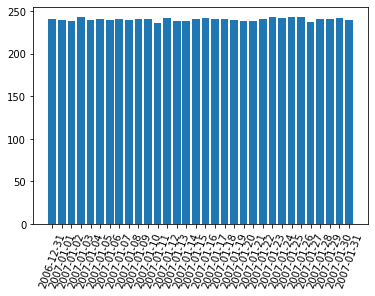

In [80]:
#Plot daily average values
plt.xticks(range(len(daily_average_data)),daily_average_data.index)
plt.bar(range(len(daily_average_data)),daily_average_data.v)
plt.xticks(rotation=70)
plt.show()

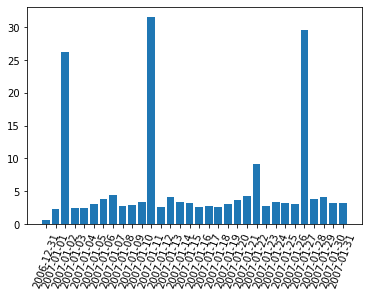

In [83]:
#Plot daily average values
plt.xticks(range(len(daily_average_data)),daily_average_data.index)
plt.bar(range(len(daily_average_data)),daily_average_data['std'])
plt.xticks(rotation=70)
plt.show()

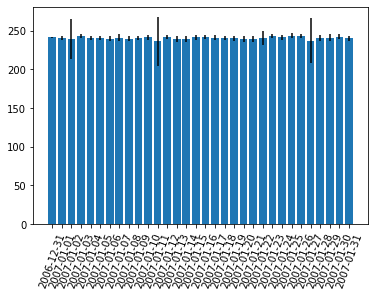

In [86]:
#Plot Unique graph with error bars
plt.xticks(range(len(daily_average_data)),daily_average_data.index)
plt.bar(range(len(daily_average_data)),daily_average_data.v, yerr=daily_average_data['std'])
plt.xticks(rotation=70)
plt.show()

In [102]:
#Extract Anomanaly Dayes (STD > 10)
anomaly_day_boolean_list = daily_average_data['std'] >= 8
anomaly_df = daily_average_data[anomaly_day_boolean_list]
print(anomaly_df)

                     v           t        std
datetime                                     
2007-01-02  239.155153  1167739170  26.250653
2007-01-11  236.046437  1168516770  31.580938
2007-01-22  240.840410  1169467170   9.084145
2007-01-27  237.100833  1169899170  29.545154
